In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy as sc
from kafe2 import *
from uncertainties import ufloat
from uncertainties import unumpy as unp

# Einlesen aller Daten

In [5]:
scale = 3 * 10**-6 / 40
# 5mW Video
fixed_mass_df = pd.read_csv("Data/Tracked_Mass/vid2_fixed_mass.txt", decimal=",", delimiter=";", skiprows=1)
mass_A_df = pd.read_csv("Data/Tracked_Mass/vid2_massA.txt", decimal=",", delimiter=";", skiprows=1)
mass_B_df = pd.read_csv("Data/Tracked_Mass/vid2_massB.txt", decimal=",", delimiter=";", skiprows=1)
mass_C_df = pd.read_csv("Data/Tracked_Mass/vid2_massC.txt", decimal=",", delimiter=";", skiprows=1)
mass_D_df = pd.read_csv("Data/Tracked_Mass/vid2_massD.txt", decimal=",", delimiter=";", skiprows=1)
mass_E_df = pd.read_csv("Data/Tracked_Mass/vid2_massE.txt", decimal=",", delimiter=";", skiprows=1)
# 3mW Video
fixed_mass2_df = pd.read_csv("Data/Tracked_Mass/3mW_fixed_mass.txt", decimal=",", delimiter=";", skiprows=1)
mass_A2_df = pd.read_csv("Data/Tracked_Mass/3mW_massA.txt", decimal=",", delimiter=";", skiprows=1)
mass_B2_df = pd.read_csv("Data/Tracked_Mass/3mW_massB.txt", decimal=",", delimiter=";", skiprows=1)
mass_C2_df = pd.read_csv("Data/Tracked_Mass/3mW_massC.txt", decimal=",", delimiter=";", skiprows=1)
mass_D2_df = pd.read_csv("Data/Tracked_Mass/3mW_massD.txt", decimal=",", delimiter=";", skiprows=1)
mass_E2_df = pd.read_csv("Data/Tracked_Mass/3mW_massE.txt", decimal=",", delimiter=";", skiprows=1)

# t, x, y
# scale ist Skalierungsfaktor von px auf um
# 5mW Video
fixed_mass = np.array([fixed_mass_df["t"] , fixed_mass_df["x"] * scale , fixed_mass_df["y"] * scale])
mass_A = np.array([mass_A_df["t"] , mass_A_df["x"] * scale , mass_A_df["y"] * scale])
mass_B = np.array([mass_B_df["t"] , mass_B_df["x"] * scale , mass_B_df["y"] * scale])
mass_C = np.array([mass_C_df["t"] , mass_C_df["x"] * scale , mass_C_df["y"] * scale])
mass_D = np.array([mass_D_df["t"] , mass_D_df["x"] * scale , mass_D_df["y"] * scale])
mass_E = np.array([mass_E_df["t"] , mass_E_df["x"] * scale , mass_E_df["y"] * scale])
# 3mW Video
fixed_mass2 = np.array([fixed_mass2_df["t"] , fixed_mass2_df["x"] * scale , fixed_mass2_df["y"] * scale])
mass_A2 = np.array([mass_A2_df["t"] , mass_A2_df["x"] * scale , mass_A2_df["y"] * scale])
mass_B2 = np.array([mass_B2_df["t"] , mass_B2_df["x"] * scale , mass_B2_df["y"] * scale])
mass_C2 = np.array([mass_C2_df["t"] , mass_C2_df["x"] * scale , mass_C2_df["y"] * scale])
mass_D2 = np.array([mass_D2_df["t"] , mass_D2_df["x"] * scale , mass_D2_df["y"] * scale])
mass_E2 = np.array([mass_E2_df["t"] , mass_E2_df["x"] * scale , mass_E2_df["y"] * scale])

# Aufgabe 4: Brownian Motion

- Abmessungen der Arbeitsfläche: 1280x1024 (x-y)  
- Koordinatenursprung: Mitte des Bildes (640 rechts/links, 512 hoch/runter)  
    - 3um entsprechen 40px +/- 5px  
    - <=> 3/40um entsprechen 1px  
    => Koordinaten müssen von px in um umgerechnet werden

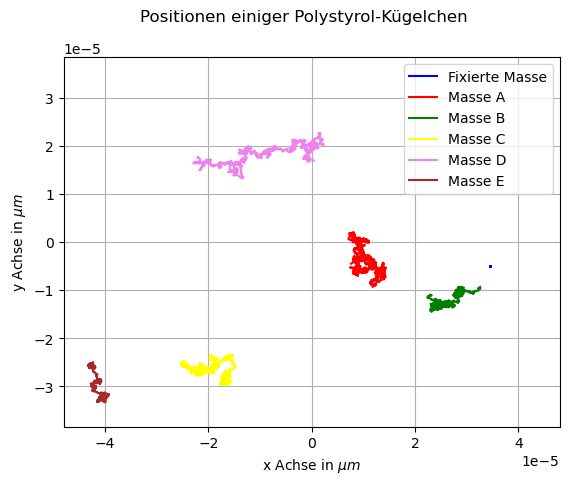

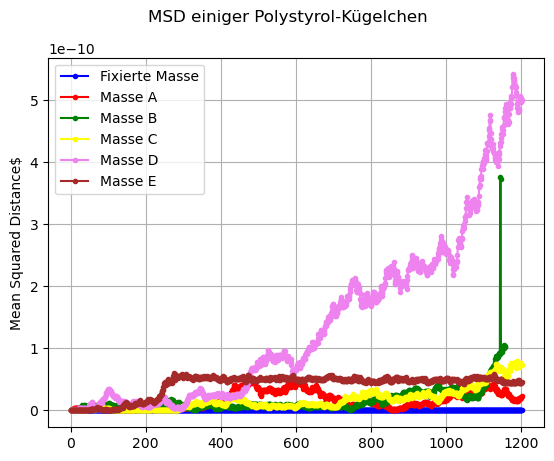

In [6]:
# Plotte Bewegung der Kügelchen
fig1, ax1 = plt.subplots()
ax1.plot(fixed_mass[1], fixed_mass[2], label="Fixierte Masse", color="blue")
ax1.plot(mass_A[1], mass_A[2], label="Masse A", color="red")
ax1.plot(mass_B[1][:-14], mass_B[2][:-14], label="Masse B", color="green")
ax1.plot(mass_C[1], mass_C[2], label="Masse C", color="yellow")
ax1.plot(mass_D[1], mass_D[2], label="Masse D", color="violet")
ax1.plot(mass_E[1], mass_E[2], label="Masse E", color="brown")
ax1.set_xlim(left=-640 * scale , right=640 * scale)
ax1.set_ylim(bottom=-512 * scale , top=512 * scale)
ax1.set(xlabel="x Achse in $\mu m$", ylabel="y Achse in $\mu m$")
fig1.suptitle("Positionen einiger Polystyrol-Kügelchen")
ax1.grid(), ax1.legend()

# Berechne und Plotte Mean Squared Displacement für jedes Kügelchen für jede Position
fig2, ax2 = plt.subplots()
msd_fixed = (fixed_mass[1]-fixed_mass[1][0])**2 + (fixed_mass[2]-fixed_mass[2][0])**2
msd_A = (mass_A[1]-mass_A[1][0])**2 + (mass_A[2]-mass_A[2][0])**2
msd_B = (mass_B[1]-mass_B[1][0])**2 + (mass_B[2]-mass_B[2][0])**2
msd_C = (mass_C[1]-mass_C[1][0])**2 + (mass_C[2]-mass_C[2][0])**2
msd_D = (mass_D[1]-mass_D[1][0])**2 + (mass_D[2]-mass_D[2][0])**2
msd_E = (mass_E[1]-mass_E[1][0])**2 + (mass_E[2]-mass_E[2][0])**2

ax2.plot(msd_fixed, color="blue", marker=".", label="Fixierte Masse")
ax2.plot(msd_A, color="red", marker=".", label="Masse A")
ax2.plot(msd_B, color="green", marker=".", label="Masse B")
ax2.plot(msd_C, color="yellow", marker=".", label="Masse C")
ax2.plot(msd_D, color="violet", marker=".", label="Masse D")
ax2.plot(msd_E, color="brown", marker=".", label="Masse E")
ax2.set( ylabel="Mean Squared Distance$")
fig2.suptitle("MSD einiger Polystyrol-Kügelchen")
ax2.grid(), ax2.legend()

msd_fixed_avg = np.zeros(np.size(msd_fixed))
for i in range(np.size(msd_fixed)): msd_fixed_avg[i] = np.sum(msd_fixed[:i-1])


# msd_fixed_avg = np.sum(msd_fixed) / len(msd_fixed)
# msd_A_avg = np.sum(msd_A) / len(msd_A)
# msd_B_avg = np.sum(msd_B) / len(msd_B)
# msd_C_avg = np.sum(msd_C) / len(msd_C)
# msd_D_avg = np.sum(msd_D) / len(msd_D)
# msd_E_avg = np.sum(msd_E) / len(msd_E)

# msd_avg_all = ( msd_A_avg + msd_B_avg + msd_C_avg + msd_D_avg + msd_E_avg ) / 5
# msd_avg_all

# Aufgabe 5: Maximum Trapping Force
- Maximalgeschwindigkeit ( 10.5 +/- .2 ) um/s  
- Temperatur: ( 20 +/- 1 ) °C für Boltzmann Verteilung gedöns  